### Question 1
#### What is our independent variable? What is our dependent variable?

> The independent variable is a 2-level factor word/color congruency. A word that is consistent between its semantic meaning and color displayed is considered congruent, whereas one with inconsistent properties are considered incongruent. The variable can be simplified as a boolean with TRUE representing either congruent/incongruent, and FALSE the other.

> The dependent variable is the time recordings in seconds.

## Question 2
#### What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.
> The set of hypotheses are as such:

$$ H_{0}:\mu_{c} = \mu_{i}  $$
$$ H_{1}:\mu_{c} < \mu_{i}  $$

> The null hypothesis states that the population mean of congruent test results is equal to the population mean of incongruent test results. The alternate hypothesis states that the population mean of congruent test results is less than the population mean of incongruent results.

> The paired t-test is chosen. It is paired because each observation of congruent and incongruent results is done by the same person and therefore not independent. The t-test, as opposed to say the z-test, is chosen because:
- Normality and the use of the Gaussian distribution is assumed
- Sample size is smaller than 30, the typical sample size required to use the z-table critical values
- The population standard deviation is not available

> A lower-tailed test is chosen because intuition tells us congruent results should be better than incongruent results since incongruent includes the element of color confusion. The alpha shall be 0.05 since it is the convention for hypothesis testing.

### Question 3
#### Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.
> For the congruent test, the mean time was about 14.05 second with variance of 12.67 seconds.

> For the incongruent test, the mean time was about 22.02 second with variance of 23.01 seconds.

In [2]:
import csv
import scipy.stats

dat = []
directory = '/users/home/google drive/education/datasets/dataanalystudacity/'
with open(directory + 'p1/stroopdata.csv', 'rb') as csvfile:
    dat_raw = csv.reader(csvfile)
    next(dat_raw, None)
    for row in dat_raw:
        dat.append(row)
        
congruent = [float(x[0]) for x in dat]
incongruent = [float(x[1]) for x in dat]

In [2]:
scipy.stats.describe(congruent)

DescribeResult(nobs=24, minmax=(8.6300000000000008, 22.327999999999999), mean=14.051124999999999, variance=12.669029070652174, skewness=0.3903776149050628, kurtosis=-0.4048936841311477)

In [3]:
scipy.stats.describe(incongruent)

DescribeResult(nobs=24, minmax=(15.686999999999999, 35.255000000000003), mean=22.015916666666669, variance=23.011757036231884, skewness=1.4491357281474821, kurtosis=1.9204728550911758)

### Question 4
#### Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.
> The first visual shows the effect on performance by the test subject itself. Performance between congruent and incongruent seem to be well correlated, meaning a test subject who tends to perform well does so for both congruent and incongruent tests. This demonstrates that there are other variables at play in determing performances.

> The second visual is a comparison between congruent and incongruent test results. It shows a clear difference between the two. In fact, the lower bound of the incongruent results does not include the mean of the congruent results. Therefore, it seems highly likely that the congruent results are faster than incongruent results.

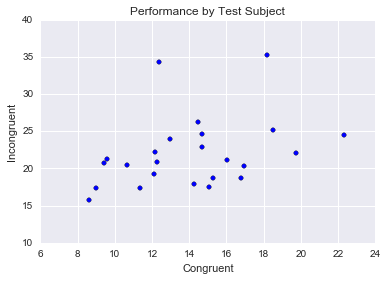

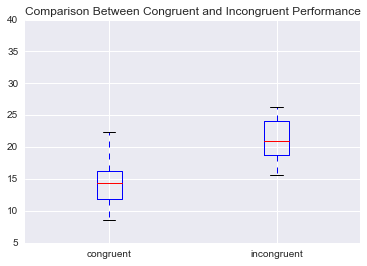

In [4]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

plt.scatter(congruent, incongruent)
plt.title('Performance by Test Subject')
plt.xlabel('Congruent')
plt.ylabel('Incongruent')

df = pd.DataFrame({
        'congruent': congruent,
        'incongruent': incongruent
    })

df.plot(kind='box', title='Comparison Between Congruent and Incongruent Performance')


## Question 5
#### Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?
> Given our critical value of 1.714 and a t-statistic of -8.021 and p-value < 0.0001. We reject the null hypothesis. The study shows that test subjects perform significantly faster on congruent tests than incongruent tests. This matches our expectations given our exploratory analysis in finding strong discrepancy between the means of the samples under circumstances of well behaved variances.

In [5]:
from scipy import stats

d = np.array(congruent) - np.array(incongruent)
mean = d.mean()
std = d.std(ddof=1)
n = int(len(dat))
crit = 1.714 # for df = 23, one-tailed, and confidence level of 95%

tt = (mean-0) / (std / np.sqrt(n))  # t-statistic for mean
pval = stats.t.sf(np.abs(tt), n-1)

if np.round(pval, 4) == 0:
    pval=0.0001

print 'N = {} t-critical = {:2.3f} t-statistic = {:2.3f} pvalue = {:2.4f}'.format(n, crit, tt, pval)

N = 24 t-critical = 1.714 t-statistic = -8.021 pvalue = 0.0001


### Question 6 Optional
#### What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!
> An excerpt from wikipedia on the stroop effect points us to the theory explaining our observation:
>> In the study of interference theory, the most commonly used procedure has been similar to Stroop's second experiment, in which subjects were tested on naming colors of incompatible words and of control patches.

> The wiki on interference theory then says:
>> Interference theory is theory regarding human memory. Interference occurs in learning when there is an interaction between the new material and transfer effects of past learned behavior, memories or thoughts that have a negative influence in comprehending the new material. Bringing to memory old knowledge has the effect of impairing both the speed of learning and memory performance.

> This is evidence that the underlying cause of the stroop effect is the conflicting information leading to a delay in learning. Therefore, a similar experiment where we might expect similar results is testing the conflicting information of numbers and the size of the numbers, asking test takers to match the numbers semantic meaning rather than its size.

#### sources
> http://stackoverflow.com/questions/14257373/skip-the-headers-when-editing-a-csv-file-using-python

> http://docs.scipy.org/doc/scipy-0.13.0/reference/generated/scipy.stats.describe.html

> http://stackoverflow.com/questions/33792478/how-to-suppress-matplotlib-warning

> http://pandas.pydata.org/pandas-docs/version/0.15.0/visualization.html

> http://docs.scipy.org/doc/scipy/reference/tutorial/stats.html

> https://people.richland.edu/james/lecture/m170/tbl-t.html

> https://en.wikipedia.org/wiki/Stroop_effect

> https://en.wikipedia.org/wiki/Interference_theory